# Homework 7

This time, we will calculate regional price differences in natural gas futures.

The prices will be gathered from CME Group web page. CME Group has json responses to price quotation. We will take "priorSettle" and "expirationMonth" from these responses

There are 5 future prices, we will be interested in

a) Henry Hub (+15% +1 $/mmbtu gives an approximate LNG price)

b) TTF price (this is €/MWh so we have convert it to $/mmbtu)

c) NBP price (£ in therms)

d) JKM price 

e) Coal price ($/ton)


Technical part:

* hh_price is the json version of the price
* hh_data is and array converted price of hh_price
* we take the 61 month future price for all
* then create a prices **dataframe**

Questions are below

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import requests
from numpy import array

In [3]:
hh="https://www.cmegroup.com/CmeWS/mvc/Quotes/Future/444/G"
ttf="https://www.cmegroup.com/CmeWS/mvc/Quotes/Future/8378/G"
nbp="https://www.cmegroup.com/CmeWS/mvc/Quotes/Future/8376/G"
jkm="https://www.cmegroup.com/CmeWS/mvc/Quotes/Future/7049/G"
coal="https://www.cmegroup.com/CmeWS/mvc/Quotes/Future/5951/G"

In [4]:
#HenryHub
r = requests.get(hh).json()
hh_price = [(item['expirationMonth'], item['priorSettle']) for item in r['quotes']]

In [5]:
#hh_price

In [6]:
#TTF 
r = requests.get(ttf).json()
ttf_price = [(item['expirationMonth'], item['priorSettle']) for item in r['quotes']]

In [7]:
#JKM 
r = requests.get(jkm).json()
jkm_price = [(item['expirationMonth'], item['priorSettle']) for item in r['quotes']]

In [8]:
#Coal
r = requests.get(coal).json()
coal_price = [(item['expirationMonth'], item['priorSettle']) for item in r['quotes']]

In [9]:
hh_data=array(hh_price)
ttf_data=array(ttf_price)
jkm_data=array(jkm_price)
coal_data=array(coal_price)

In [10]:
hh_prices=hh_data[0:61,1].astype(float)
ttf_prices=ttf_data[0:61,1].astype(float)/(3.421*1.17)
jkm_prices=jkm_data[0:61,1].astype(float)
coal_prices=coal_data[0:61,1].astype(float)/23.8

In [11]:
prices=pd.DataFrame(list(zip(hh_data[0:61,0],hh_prices,ttf_prices, jkm_prices,coal_prices)),columns=["Date","HH","TTF","JKM","Coal"])

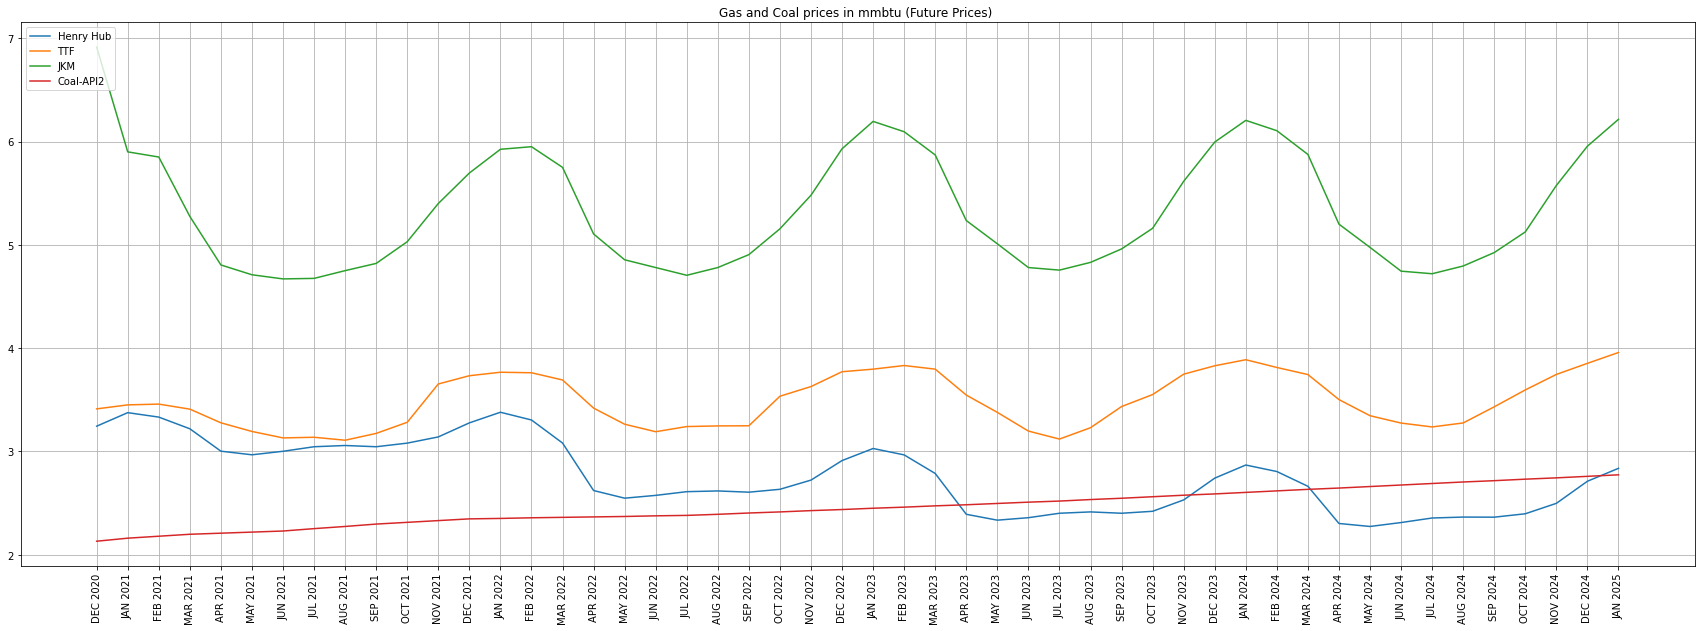

In [12]:
#some style
figure(figsize(30,10))
grid("on");
xticks(rotation=90);
title("Gas and Coal prices in mmbtu (Future Prices) ")


# now plot data
plot(prices.Date,prices.HH,label="Henry Hub")
plot(prices.TTF ,label="TTF");
plot(prices.JKM, label="JKM");
plot(prices.Coal, label="Coal-API2");

# put the legend
legend(loc="upper left");


# Now it is your turn
* 1) Plot the price difference between TTF and HH*1.15 
       prices.Date,prices.TTF-prices.HH*1.15

* 2) Plot the price difference between Coal(API2) and Henry Hub
       plot HenryHub (prices.HH)
       plot Coal     ( prices.Coal)
       plot difference in a seperate grapg( prices.HH-prices.Coal)


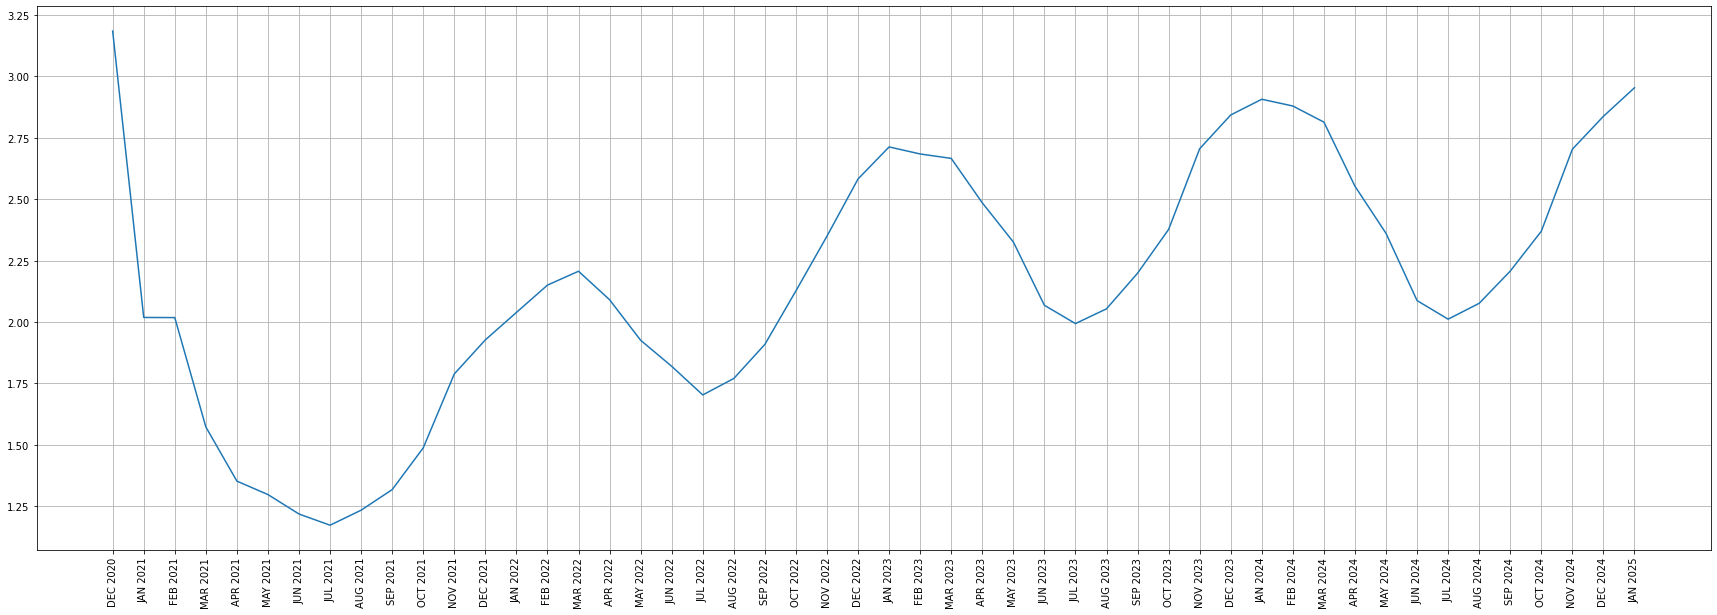

In [15]:
xticks(rotation=90)
grid("on")

plot(prices.Date,prices.JKM-prices.HH*1.15)

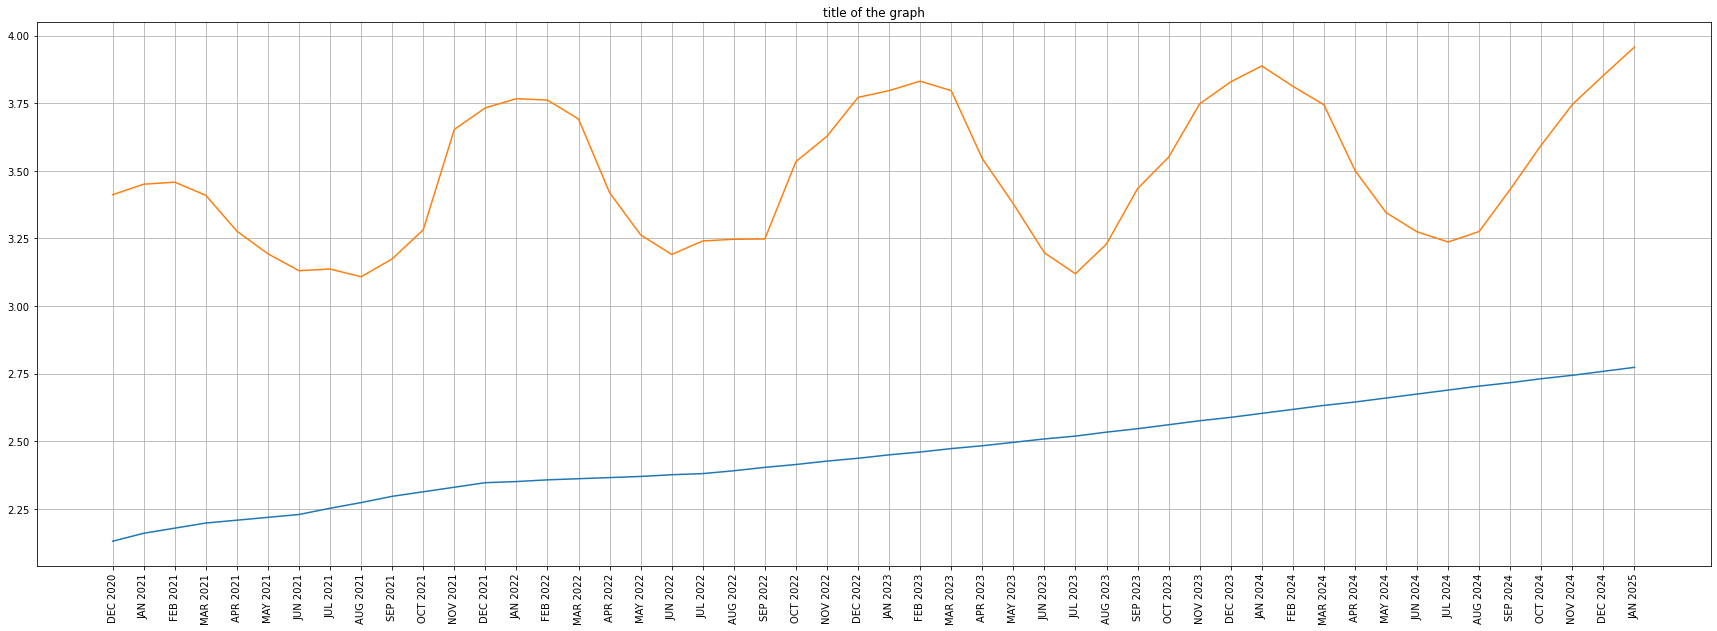

In [16]:
xticks(rotation=90)
grid("on")
title("title of the graph")
#your plot
#plot(plot(prices.Date,prices.HH)
#plot(plot(prices.Date,prices.TTF)
#plot(plot(prices.Date,prices.JKM)
plot(prices.Date,prices.Coal)
plot(prices.TTF)